In [2]:
from os import listdir
from os.path import isfile, join

import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
palm_root_path = "data/right_hand_palm"
fist_root_path = "data/right_hand_fist"

palm_paths = [join(palm_root_path, f) for f in listdir(palm_root_path) if isfile(join(palm_root_path, f))]
fist_paths = [join(fist_root_path, f) for f in listdir(fist_root_path) if isfile(join(fist_root_path, f))]

palm_names = [f for f in listdir(palm_root_path) if isfile(join(palm_root_path, f))]
fist_names = [f for f in listdir(fist_root_path) if isfile(join(fist_root_path, f))]

palm_images = [cv2.imread(path) for path in palm_paths]
fist_images = [cv2.imread(path) for path in fist_paths]
print(len(palm_images), len(fist_images))

399 316


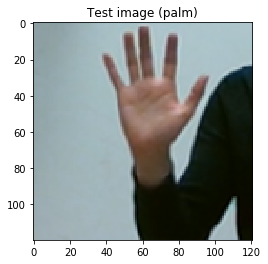

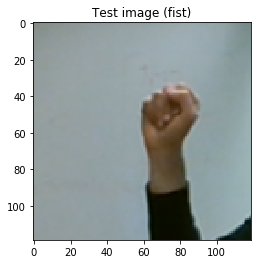

In [42]:
def show_opencv_img(image, title):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()
    
def blur_image(image):
    return cv2.blur(image, (3,3))

def sharpen_image(image):
    kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])
    return cv2.filter2D(image, -1, kernel_sharpening)

def image_gradients(image):
    img_grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gradients_x = cv2.Sobel(img_grayscale, cv2.CV_64F, 1, 0, ksize=5)
    gradients_y = cv2.Sobel(img_grayscale, cv2.CV_64F, 0, 1, ksize=5)
    return gradients_x, gradients_y
    
test_palm = palm_images[0]
test_fist = fist_images[0]
show_opencv_img(test_palm, "Test image (palm)")
show_opencv_img(test_fist, "Test image (fist)")

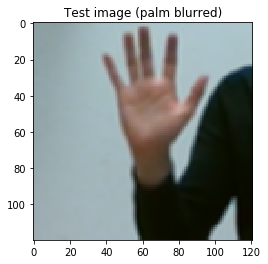

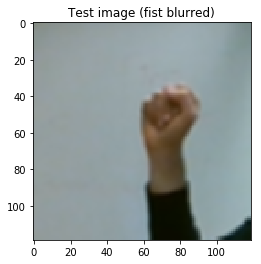

In [36]:
test_palm_blurred = blur_image(test_palm)
test_fist_blurred = blur_image(test_fist)
show_opencv_img(test_palm_blurred, "Test image (palm blurred)")
show_opencv_img(test_fist_blurred, "Test image (fist blurred)")

34793577.0
15603191.0


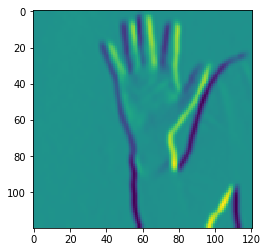

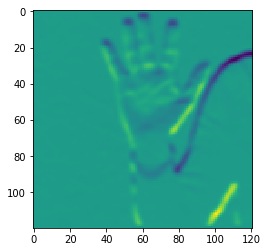

In [44]:
gradients_x, gradients_y = image_gradients(blur_image(test_palm))

plt.figure()
plt.imshow(gradients_x)
plt.figure()
plt.imshow(gradients_y)

print(np.sum(np.abs(gradients_x)))
print(np.sum(np.abs(gradients_y)))

15705685.0
7560167.0


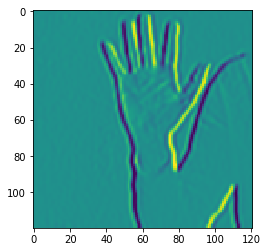

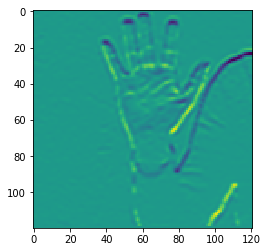

In [46]:
gradients_x, gradients_y = image_gradients(sharpen_image(test_palm))

plt.figure()
plt.imshow(gradients_x)
plt.figure()
plt.imshow(gradients_y)

print(np.sum(np.abs(gradients_x)))
print(np.sum(np.abs(gradients_y)))

3249002.0
1865578.0


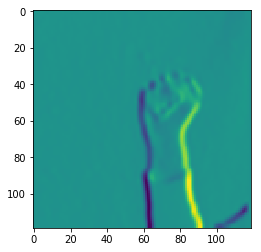

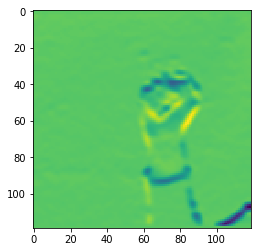

In [47]:
gradients_x, gradients_y = image_gradients(blur_image(test_fist))

plt.figure()
plt.imshow(gradients_x)
plt.figure()
plt.imshow(gradients_y)

print(np.sum(np.abs(gradients_x)))
print(np.sum(np.abs(gradients_y)))

7840903.0
4921351.0


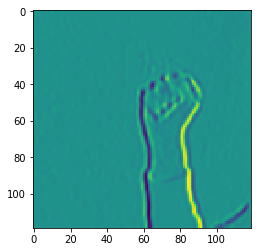

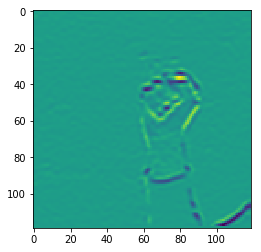

In [48]:
gradients_x, gradients_y = image_gradients(sharpen_image(test_fist))

plt.figure()
plt.imshow(gradients_x)
plt.figure()
plt.imshow(gradients_y)

print(np.sum(np.abs(gradients_x)))
print(np.sum(np.abs(gradients_y)))

In [78]:
palm_gradient_magnitudes_x = []
palm_gradient_magnitudes_y = []
for palm_img in palm_images:
    gradients_x, gradients_y = image_gradients(sharpen_image(palm_img))
    palm_gradient_magnitudes_x.append(np.sum(np.abs(gradients_x)))
    palm_gradient_magnitudes_y.append(np.sum(np.abs(gradients_y)))
    
fist_gradient_magnitudes_x = []
fist_gradient_magnitudes_y = []
for fist_img in fist_images:
    gradients_x, gradients_y = image_gradients(sharpen_image(fist_img))
    fist_gradient_magnitudes_x.append(np.sum(np.abs(gradients_x)))
    fist_gradient_magnitudes_y.append(np.sum(np.abs(gradients_y)))

palm_gradient_magnitudes_x = np.array(palm_gradient_magnitudes_x)
palm_gradient_magnitudes_y = np.array(palm_gradient_magnitudes_y)
fist_gradient_magnitudes_x = np.array(fist_gradient_magnitudes_x)
fist_gradient_magnitudes_y = np.array(fist_gradient_magnitudes_y)
    
print(np.average(palm_gradient_magnitudes_x), np.average(palm_gradient_magnitudes_y))
print(len(np.where(palm_gradient_magnitudes_x > palm_gradient_magnitudes_y)[0]))
print(np.average(fist_gradient_magnitudes_x), np.average(fist_gradient_magnitudes_y))
print(len(np.where(fist_gradient_magnitudes_y > fist_gradient_magnitudes_x)[0]))

15559420.426065164 13709573.824561404
293
11696990.221518988 14836203.556962024
226
